# **SVM - Kernel comparison**

## Kernel interpretation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
from sklearn import svm
from sklearn.datasets import make_gaussian_quantiles

In [9]:
X, Y = make_gaussian_quantiles(cov=2,
                                 n_samples=2000, n_features=2,
                                 n_classes=2, random_state=1)

X[Y==0] = X[Y==0]*0.5


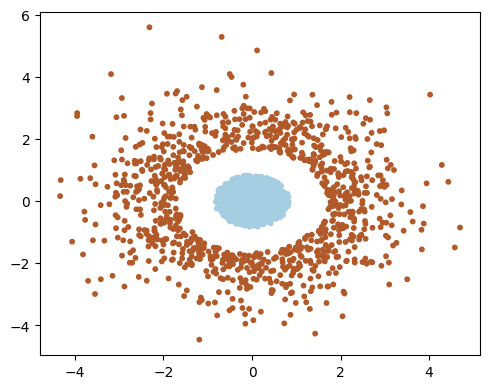

In [10]:
_, ax = plt.subplots(figsize=(5,4))
ax.scatter( X[:,0] , X[:,1], c = Y , s=10, cmap=plt.cm.Paired)
plt.tight_layout()

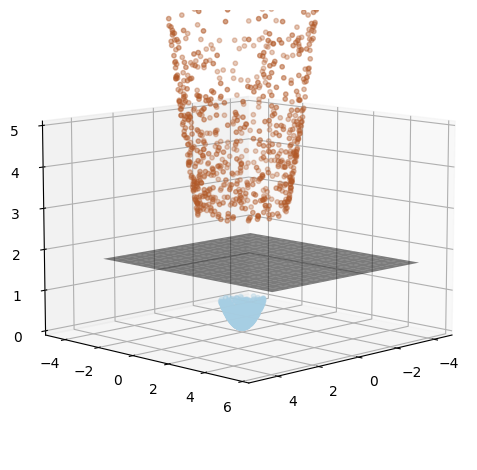

In [ ]:
Xk = X[:,0]**2 + X[:,1]**2
f = plt.figure()
ax = f.add_subplot(projection="3d") #Crea plot en 3 dimensiones

ax.view_init(10,45)
ax.scatter3D(X[:,0] , X[:,1], Xk ,c = Y , s=10, cmap=plt.cm.Paired)

hx,hy = np.meshgrid(np.arange(-4,4,0.5),np.arange(-4,6,0.5))
hz = np.ones(hx.shape) * 1.7
ax.plot_surface(hx,hy,hz,color="k", alpha=0.5)
ax.set_zlim(0,5)
plt.tight_layout()

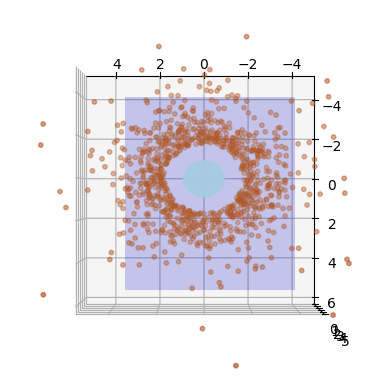

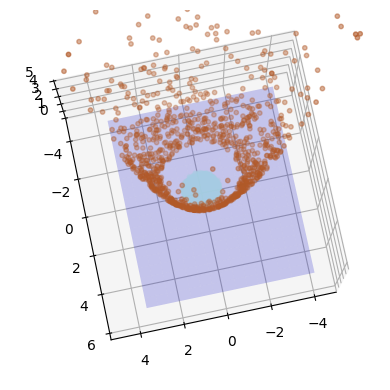

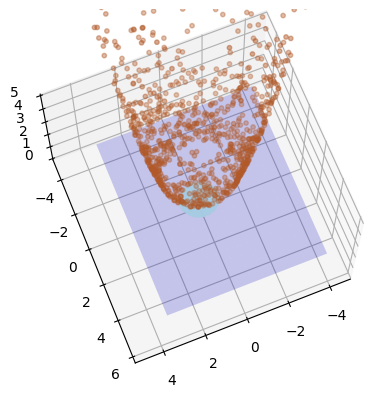

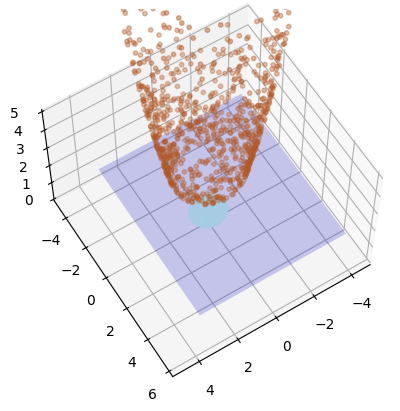

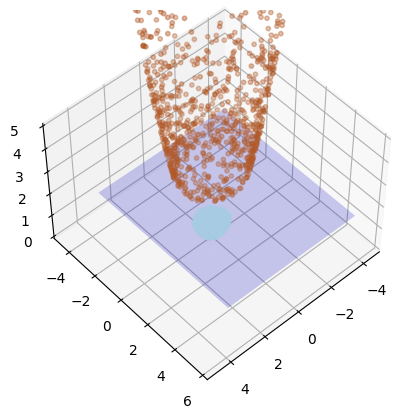

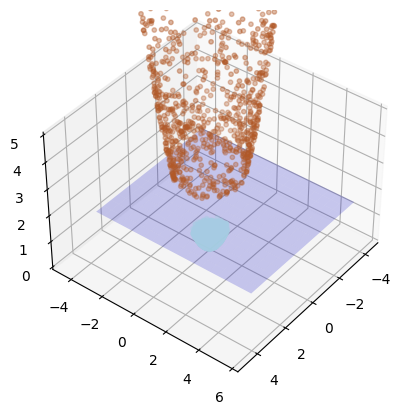

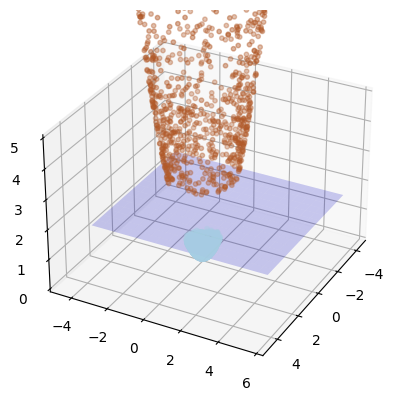

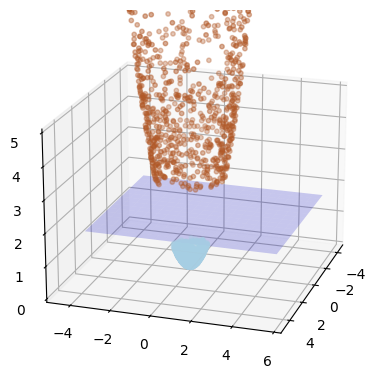

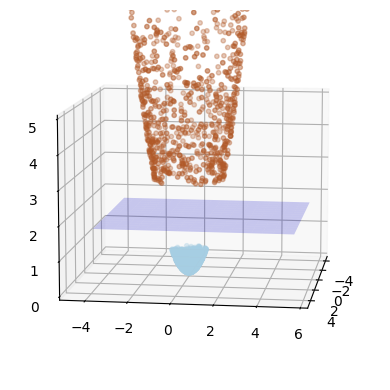

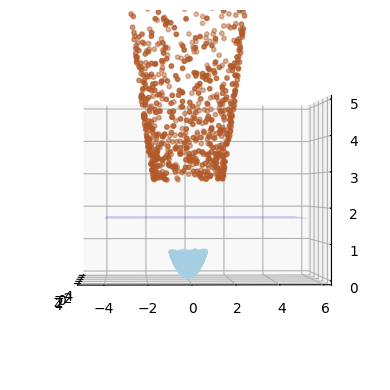

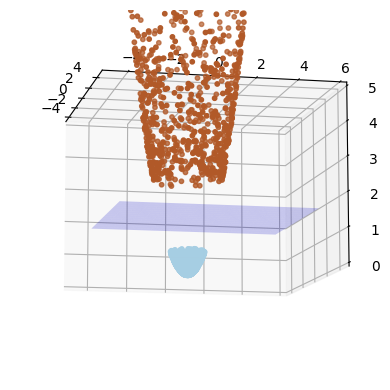

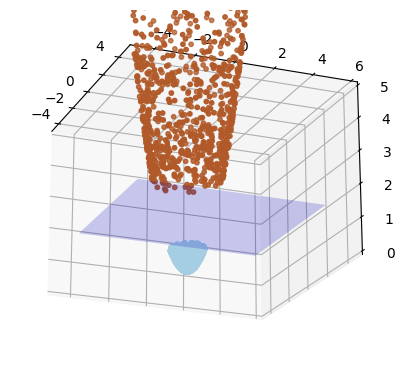

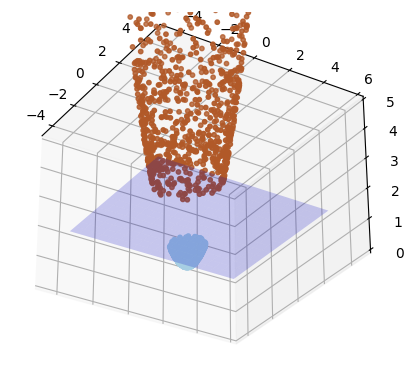

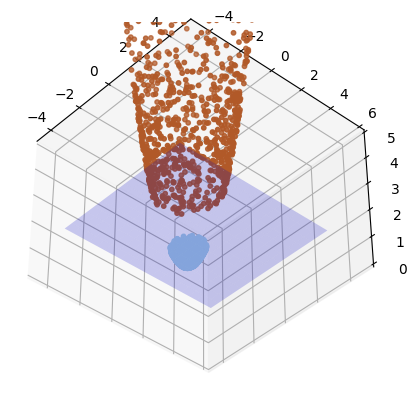

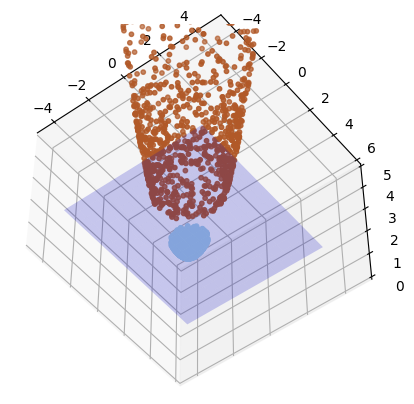

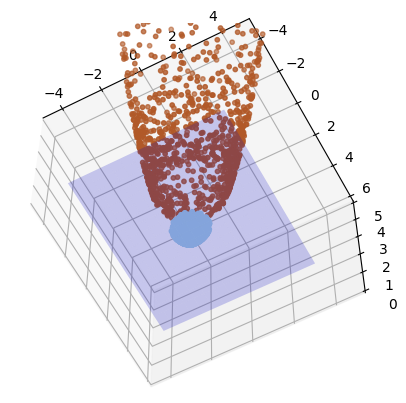

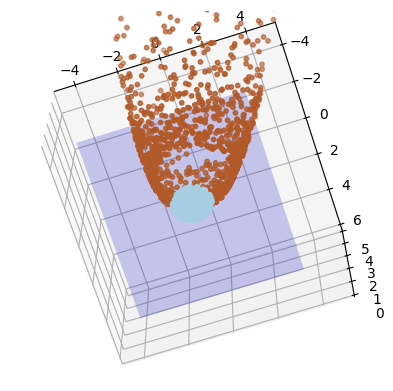

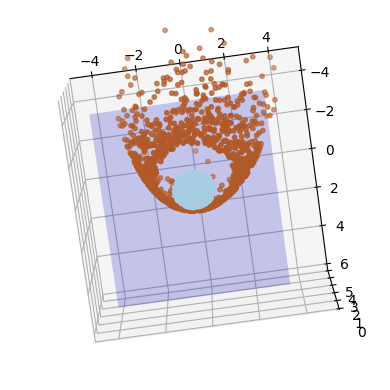

In [ ]:
# Sve all figs
for index, angle in enumerate(range(90,-90,-10), start=1):
  f= plt.figure(figsize=(5,4))
  ax = f.add_subplot(projection="3d")
  ax.view_init(angle,angle-2)
  ax.scatter3D(X[:,0] , X[:,1], Xk ,c = Y , s=10, cmap=plt.cm.Paired)

  hx,hy = np.meshgrid(np.arange(-4,4,0.5),np.arange(-4,6,0.5))
  hz = np.ones(hx.shape) * 1.7
  ax.plot_surface(hx,hy,hz,color="blue", alpha=0.2)
  ax.set_zlim(0,5)
  plt.tight_layout()
  plt.savefig("animation/{0}.png".format(index), dpi=100, bbox_inches=0, pad_inches="tight" )


In [ ]:
import os
from PIL import Image
from natsort import natsorted, ns

files_ = os.listdir("/content/animation/")
print(files_)
files_ = natsorted(files_,alg=ns.PATH)
print(files_)

all_images = []

# # Save a gif
for file_ in files_:
    # Open the image file
    images = Image.open("/content/animation/" + file_)

    # Append the image to the list
    all_images.append(images)


images.save("kernel_ill.gif", save_all=True, append_images=all_images, duration=200, loop=0)

['11.png', '3.png', '18.png', '17.png', '13.png', '2.png', '4.png', '6.png', '16.png', '9.png', '12.png', '8.png', '7.png', '1.png', '5.png', '15.png', '10.png', '14.png']
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png']


In [ ]:
!rm -r /content/animation/.ipynb_checkpoints

## SVM

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [ ]:
# we create 100 separable points
X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

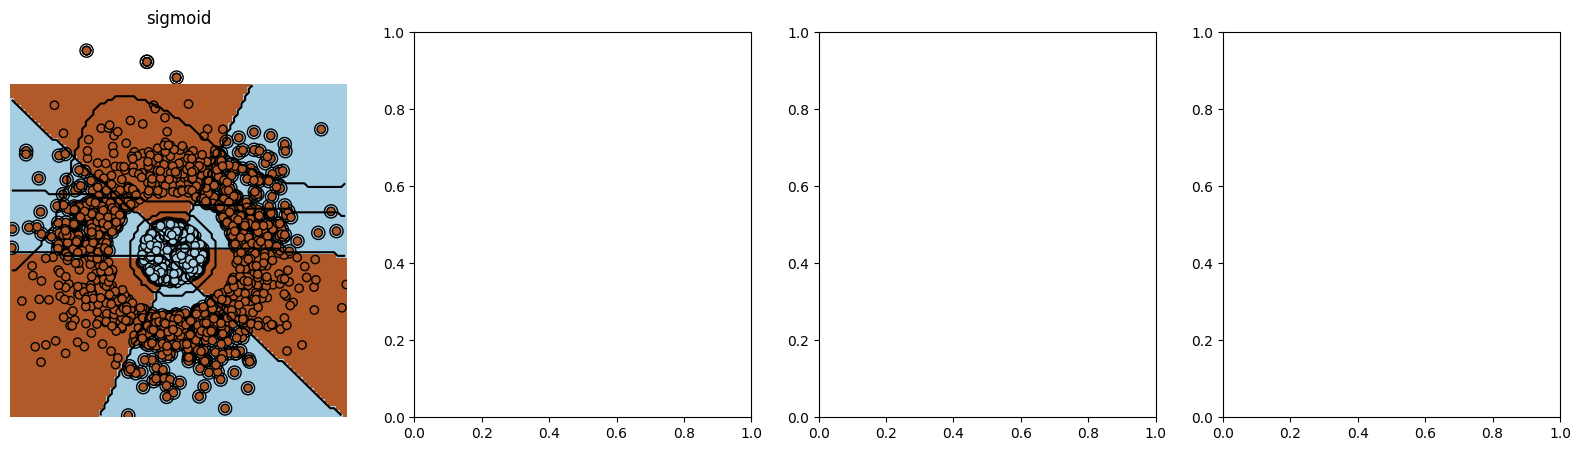

In [18]:

kernels = ['linear', 'poly', 'rbf',"sigmoid"]
_, axes = plt.subplots(1,4, figsize = (20,5))

i=0

# fit the model
for kernel in kernels :
    svm = SVC(kernel = kernel , gamma = 1)
    svm.fit( X , Y )

    h_min, h_max = X[:,0].min() , X[:,0].max()
    v_min, v_max = X[:,1].min() , X[:,0].max()

    h_grid, v_grid = np.meshgrid(np.arange( h_min , h_max , 0.1), np.arange( v_min , v_max , 0.1))
    predictions = svm.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

    predictions = predictions.reshape( h_grid.shape )
    axes[i].pcolormesh( h_grid , v_grid , predictions, cmap = plt.cm.Paired)
    axes[i].contour( h_grid , v_grid , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    axes[i].set_axis_off()
    axes[i].set_title(kernel)
    i+=0


plt.show()

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm)
    axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

Crear una función para graficar las fronteras de decisión de las SVM con las dos opciones mostradas anteriormente.

## In real data

Continúe evaluando los kernels anteriores en la base de datos Iris y fruits.